<a href="https://colab.research.google.com/github/eric4550/gradient-descent-homework/blob/master/gradient-descent-homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-D Gradient descent coding problem

Instructions:
- There are 4 problems.  For each, replace the comment YOUR CODE HERE with your code.
- Do not modify the code in other ways.  You will probably want to write test code while you're getting your code working.  Mark your test code clearly and then remove it before submitting.
- Before submitting your code, select 'Restart and run all' from the Runtime menu.

In [162]:
import numpy as np
import matplotlib.pyplot as plt

## Derivatives

In calculus, you are given the definition of a function f and told to find the derivative f', which is another function.  To solve this problem, you need to know the definition of f, and also have the skill to find the derivative.  For some functions it's very hard to work out the derivative this way.

Here we use a different method.  We compute the derivative of a function **numerically**, which means algorithmically.  The benefit of working this way is that we don't need to know the definition of the function, and we don't need to know the techniques you learned in calculus class.

#### Problem 1

In [163]:
def deriv(f):
  """ return the numeric derivative of single-variable function f """
  h = 0.00001
  return lambda x: (f(x+h)-f(x))/h

In [164]:
# test the deriv() function

def g(x):
  return 2*((x-1)**2)

# print the value of the derivative of function g at 0, 1, 3  
g_prime = deriv(g)
for x in [0, 1, 3]:
  print('x: {:0.3f}, g_prime(x): {:0.3f}'.format(x, g_prime(x)))    

x: 0.000, g_prime(x): -4.000
x: 1.000, g_prime(x): 0.000
x: 3.000, g_prime(x): 8.000


In [165]:
def plot_fun_and_deriv(f):
  """ plot single-variable function f and its derivative """
  f_prime = deriv(f)
  xs = np.linspace(-5, 5, num=50)
  fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(5,8))
  axes[0].plot(xs, [f(x) for x in xs])
  axes[0].set_title('function')
  axes[1].plot(xs, [f_prime(x) for x in xs])
  axes[1].set_title('derivative')

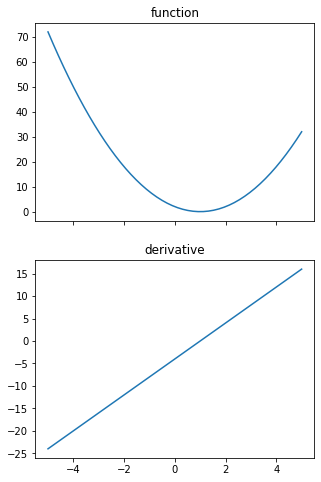

In [166]:
plot_fun_and_deriv(g)

## Gradient descent

In gradient descent we want to find the value of x that minimizes (or maximizes) a function f.  We do this by starting with some x, computing th derivative of f at x, and then using the derivative to make an adjustment to x.

#### Problem 2

In [167]:
def grad_descent_1d(f, n_iterations=1000, alpha=0.01):
  """ Return the value x for which function f(x) is minimum.  Also
  return the values of x along the path of gradient descent.  """
  
  x = 0.0    # the starting value for gradient descent
  xs = []    # all the x values encountered during gradient descent

  for i in range(n_iterations):
    d = deriv(f)
    x = x - alpha * d(x)
    xs.append(x)
  # hint: note that this function only needs to use the derivative of f, not 
  # f itself
  return x, xs

In [168]:
# test the grad_descent_1d function
f1 = lambda x: (x - 1)**2
f2 = lambda x: 0.2*(x**2) + np.sin(x)

for f in [f1, f2]:
  x, xs = grad_descent_1d(f)
  print('x = {:0.4f}, f(x) = {:0.4f}'.format(x, f(x)))

x = 1.0000, f(x) = 0.0000
x = -1.1105, f(x) = -0.6493


In [169]:
def plot_descent(f, xs):
  """ plot value of function f as gradient descent proceeds """
  plt.plot(range(len(xs)), [f(x) for x in xs])
  plt.xlabel('iteration')
  plt.ylabel('f(x)')
  plt.title('Progress of gradient descent')
  plt.grid();

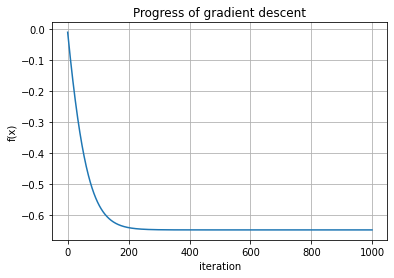

In [170]:
# plot progress of gradient descent for function f2
x, xs = grad_descent_1d(f2)
plot_descent(f2, xs)

## MSE loss

The key idea for training linear regression is that we want to use linear regression to find the model parameters that minimize the loss function.  For linear regression, the loss function is "mean squared error" (MSE).

Note that to compute the MSE we need to use both the model parameters and the training data.

In [171]:
# create training data
# x is the single predictor value, y is the target value
# x,y are NumPy arrays
np.random.seed(0)  # set seed for repeatability

# generate points on the line y = b0 + b1*x, then add noise
b0 = 1.5
b1 = 2.5
n = 20
x = np.linspace(0, 10, num=n)   # n values evenly spaced from 0 to 10
y = b0 + b1*x
noise = np.random.normal(scale=4.0, size=n)   # n values sampled from normal distributions
y = y + noise

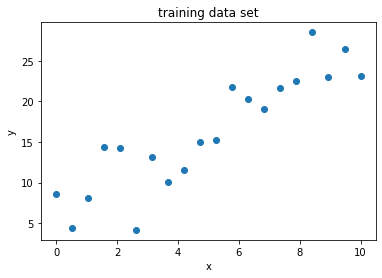

In [172]:
# plot the training data
plt.scatter(x,y);
plt.title('training data set')
plt.xlabel('x')
plt.ylabel('y');

#### Problem 3

In [173]:
# b0 is known and fixed
def mse_loss(b1):
  """ return MSE loss for a linear function based on model parameters and training data """
  return np.square((b0 + b1 * x) - y).mean()

In [174]:
# test mse_loss() by computing the loss for various
# values of parameter b1
for b in [0, b1, b1-1, b1+1, b1+2]:
  print('b1: {:0.3f}, mse_loss(x): {:0.3f}'.format(b, mse_loss(b)))

b1: 0.000, mse_loss(x): 266.552
b1: 2.500, mse_loss(x): 16.751
b1: 1.500, mse_loss(x): 65.356
b1: 3.500, mse_loss(x): 36.568
b1: 4.500, mse_loss(x): 124.806


## Linear regression

Now we can put together our gradient descent function and mse_loss function to perform linear regression.

#### Problem 4

In [178]:
# use gradient descent to find the value of b1 that minimizes the mse_loss function
b1_estimated, x2 = grad_descent_1d(lambda b1: mse_loss(b1), 10)

print(b1_estimated)

2.7103395549818994


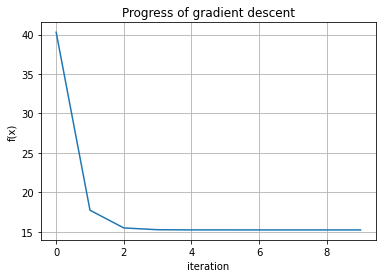

In [179]:
plot_descent(mse_loss, x2)

Plot training data and best fit line.

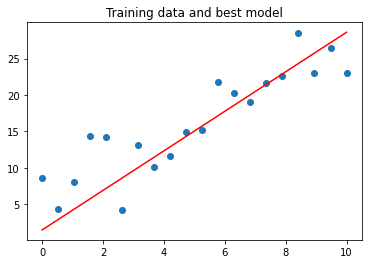

In [180]:
plt.scatter(x, y)
y_pred = b0 + b1_estimated*x
plt.plot(x, y_pred, c='red')
plt.title('Training data and best model');